In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
time = []
speed = []
kmh = []
acc = [0]
Facc = []
Ft = []
Fa = []
Fr = []
Fg = []
Torque_wheel = []
Torque_EM = []
RPM_wheel = []
RPM_EM = []
GR = 1  
GR_eff = 0.98
rads_EM = []
power_em = []
file = str("UDDS.csv")

In [4]:
# import UDDS_cycle data and put them in arrys (Time, Speed)
df = pd.read_csv(file, header=1)
df = df.reset_index()
#print(df_udds.to_string())
for index, row in df.iterrows():
    time.append(row['Test Time'])
    speed.append(row['mph'])
    # print(row['Test Time'], row['mph'])

#print(speed[10])

# convert mph to m/s
for i in range(len(speed)):
    speed[i] = speed[i]*0.44704
#print(speed)


In [5]:
# constants for equations values taken from Volvo Datablad "FM 6x4 R jämnlast Elektrisk FM 64R E (3900)"
mv = 10160      # curb weight 
Cd = 0.5         # drag coefficiant european truck
g = 9.82        # gravitational acceleration
rho = 1.225     # standard air density
wheel_r = 453   # radius taken from datablad
wheel_d = (2*wheel_r*0.97)/1000 # wheel diameter with deformation
Cr = 0.008 # https://www.engineeringtoolbox.com/rolling-friction-resistance-d_1303.html
Af = (2.5 * (2987 - (math.sin(math.radians(16)) * 1368))/1000) #calculate frontal area
alpha = 0 # slope angel degrees
print(wheel_d/2)

0.43940999999999997


In [6]:
# m/s to kmh
for i in range(len(speed)):
    kmh.append(speed[i] * 3.6)
max_kmh = max(kmh)
print(kmh)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.828032, 9.495129600000002, 13.8403584, 18.507456, 23.0136192, 27.197913599999996, 27.8416512, 29.1291264, 33.313420799999996, 34.9227648, 36.0493056, 36.210240000000006, 35.566502400000005, 34.600896, 33.6352896, 32.8306176, 31.8650112, 27.358848000000002, 23.9792256, 23.9792256, 24.4620288, 24.944832, 25.749504, 27.519782400000004, 30.738470400000004, 33.957158400000004, 36.532108799999996, 36.85397759999999, 36.532108799999996, 36.3711744, 34.2790272, 30.577536000000002, 27.519782400000004, 25.4276352, 25.4276352, 28.4853888, 31.8650112, 34.7618304, 37.3367808, 38.9461248, 39.5898624, 40.0726656, 40.2336, 39.5898624, 39.428928, 39.7507968, 39.9117312, 39.7507968, 39.5898624, 39.5898624, 40.394534400000005, 41.1992064, 41.360140799999996, 40.8773376, 40.0726656, 40.2336, 40.8773376, 41.842944, 41.842944, 41.360140799999996, 42.003878400000005, 42.9694848, 44.25696, 46.0272384, 4

In [7]:
# GR calculations
max_speed = 100 # max speed in kmh
W_wheel_max = (max_speed / (18/5)) / (wheel_d/2) # max rotational speed wheel radians
W_EM_max = (10000*2*math.pi)/60 # max rotation speed of EM in Rad/s
GR = math.floor(W_EM_max / W_wheel_max)
print(GR) # max GR given max speed of cycle

16


In [8]:
# create list of acceleration (dV/dT)
for i in range(len(speed)-1):
    acc.append(speed[i+1]-speed[i])
print(len(acc), len(time))

1370 1370


In [9]:
# Rolling friction Fr
Fr = Cr * (mv * g)
print(f"{Fr} Newton")

798.1696 Newton


In [10]:
# Aerodynamic drag force Af
for i in range(len(speed)):
    Fa.append(0.5 * rho *Af * Cd * speed[i]**2)
print(Fa)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.59401534606974, 13.900852688520851, 29.534819443924214, 52.81205883530255, 81.660022013089, 114.05408033233088, 119.51698365835693, 130.82615194732304, 171.11107062638024, 188.0428762567533, 200.37034889377247, 202.16336321642288, 195.03922613043576, 184.59262152452632, 174.43353814630254, 166.1872696022647, 156.55530847479787, 115.40782611268386, 88.65637188677142, 88.65637188677142, 92.2623672839947, 95.94024298813945, 102.22976984376147, 116.76955859380585, 145.68141537774466, 177.78795246930096, 205.77335196403064, 209.4152875147146, 205.77335196403064, 203.96436423984224, 181.1743135953756, 144.15994888124177, 116.76955859380585, 99.68999899920553, 99.68999899920553, 125.10767419668763, 156.55530847479787, 186.31375554025533, 214.9380910965085, 233.86657191914244, 241.6615918697293, 247.5917171907443, 249.5843990326208, 241.6615918697293, 239.700856830929, 243.6303136092986,

In [11]:
# Slope hill driving force Fg
Fg = mv * g * math.sin(math.radians(alpha))
print(Fg)

0.0


In [12]:
# Force needed to accilarate
for i in range(len(speed)):
    Facc.append(mv*acc[i])
print(Facc)

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13625.7792, 13171.586560000002, 12263.201279999996, 13171.586559999998, 12717.393920000004, 11809.00863999999, 1816.7705600000122, 3633.541119999997, 11809.00863999999, 4541.926400000012, 3179.348479999994, 454.19264000001203, -1816.770559999994, -2725.155840000018, -2725.1558400000004, -2270.963200000006, -2725.155839999982, -12717.393920000004, -9538.04544, 0.0, 1362.577919999991, 1362.577920000009, 2270.963199999997, 4996.119040000006, 9083.852800000006, 9083.852799999988, 7267.082239999994, 908.385279999988, -908.385279999988, -454.192639999994, -5904.504319999995, -10446.430720000008, -8629.660159999994, -5904.504320000004, 0.0, 8629.660159999994, 9538.045440000009, 8175.46752, 7267.082239999994, 4541.926399999994, 1816.7705600000122, 1362.577919999982, 454.19264000001203, -1816.770559999994, -454.19264000001203, 908.3852800000061, 454.192639999994, -454.192639999994, -454.19263

In [13]:
# acceleration force alt. tracktion force Facc of Ft
for i in range(len(speed)):
    Ft.append(Facc[i]+(Fa[i]+Fr+Fg))
print(max(Ft))

16064.847268399622


In [14]:
# torque at wheel
for i in range(len(speed)):
    Torque_wheel.append(Ft[i]*(wheel_d/2))
print(f"{max(Torque_wheel)} Nm")

7059.054538207478 Nm


In [15]:
# torque of EM
for i in range(len(speed)):
    Torque_EM.append((Torque_wheel[i] / GR))
print(max(Torque_EM))

441.19090863796737


In [16]:
# power of EM
for i in range(len(speed)):
    RPM_wheel.append(speed[i] / ((2*math.pi * (wheel_d/2))/60))
    RPM_EM.append(RPM_wheel[i] * GR)
    rads_EM.append((RPM_EM[i] * (2*math.pi))/60)
    power_em.append(Torque_EM[i] * rads_EM[i])
print(RPM_wheel)
print(max(RPM_EM)) 
print(rads_EM)
print(f"{max(power_em)/1000} kW")



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.14533724030897, 57.3191632392743, 83.54996675555236, 111.7237927545177, 138.9261075121394, 164.1853997870738, 168.07144475244837, 175.84353468319742, 201.10282695813183, 210.81793937156817, 217.6185180609736, 218.59002930231725, 214.70398433694274, 208.8749168888809, 203.04584944081913, 198.18829323410094, 192.3592257860392, 165.15691102841748, 144.7551749602012, 144.7551749602012, 147.66970868423206, 150.58424240826298, 155.44179861498114, 166.1284222697611, 185.55864709663376, 204.9888719235064, 220.5330517850045, 222.47607426769173, 220.5330517850045, 219.56154054366087, 206.93189440619366, 184.58713585529011, 166.1284222697611, 153.4987761322939, 153.4987761322939, 171.95748971782288, 192.3592257860392, 209.84642813022455, 225.39060799172267, 235.105720405159, 238.99176537053353, 241.9062990945644, 242.87781033590804, 238.99176537053353, 238.02025412918988, 239.9632766118771

In [17]:
max_nm = round(((wheel_d / 2) * max(Ft) / GR))
max_speed_final = (10000/GR) * (2*math.pi*(wheel_d/2))/60
print(f"Maximum torque, from EM, needed for cycle is {max_nm} Nm")
print(f"Maximum power, from EM, needed for cycle is {round(max(power_em)/1000,2)} kW")
print(f"Highest gearratio given drivecycle is {GR} that gives a maxspeed of {(max_speed_final * 3.6):.2f} km/h")


Maximum torque, from EM, needed for cycle is 441 Nm
Maximum power, from EM, needed for cycle is 222.72 kW
Highest gearratio given drivecycle is 16 that gives a maxspeed of 103.53 km/h


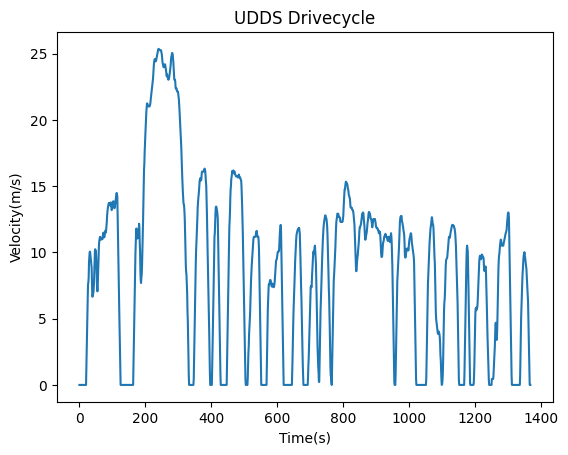

In [18]:
# plott speed time drivecycle
plt.plot(time,speed)
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.title(f"{file[0:4]} Drivecycle")
plt.savefig(f"{file[0:4]} Drivecycle.png",dpi=1000,bbox_inches='tight')


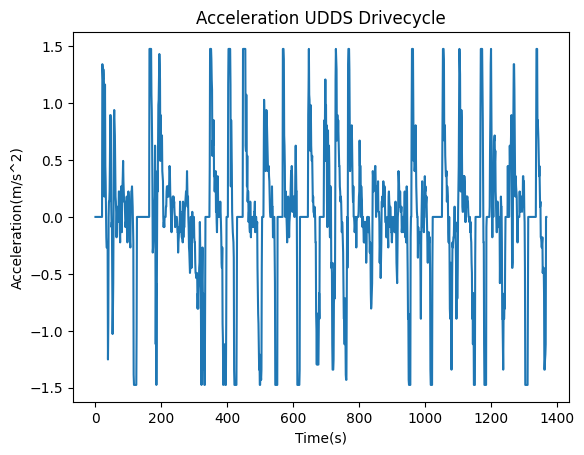

In [19]:
# plot acceleration time
plt.plot(time, acc)
plt.xlabel("Time(s)")
plt.ylabel("Acceleration(m/s^2)")
plt.title(f"Acceleration {file[0:4]} Drivecycle")
plt.savefig(f"Acceleration {file[0:4]} Drivecycle.png",dpi=1000,bbox_inches='tight')

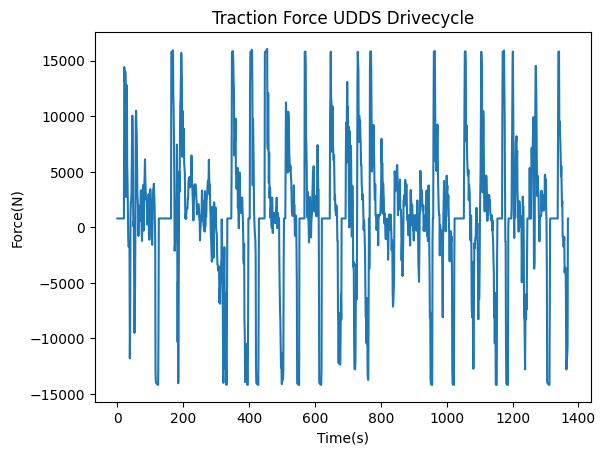

In [20]:
# plot traction force
plt.plot(time, Ft)
plt.xlabel("Time(s)")
plt.ylabel("Force(N)")
plt.title(f"Traction Force {file[0:4]} Drivecycle")
plt.savefig(f"Traction Force {file[0:4]} Drivecycle.png",dpi=1000,bbox_inches='tight')

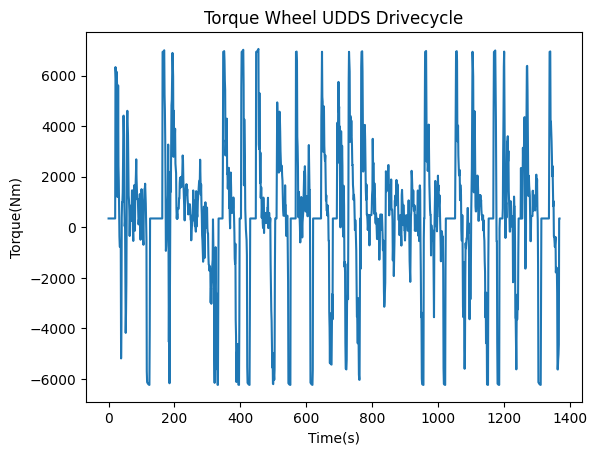

In [21]:
# plot torque wheel
plt.plot(time, Torque_wheel)
plt.xlabel("Time(s)")
plt.ylabel("Torque(Nm)")
plt.title(f"Torque Wheel {file[0:4]} Drivecycle")
plt.savefig(f"Torque Wheel {file[0:4]} Drivecycle.png",dpi=1000,bbox_inches='tight')

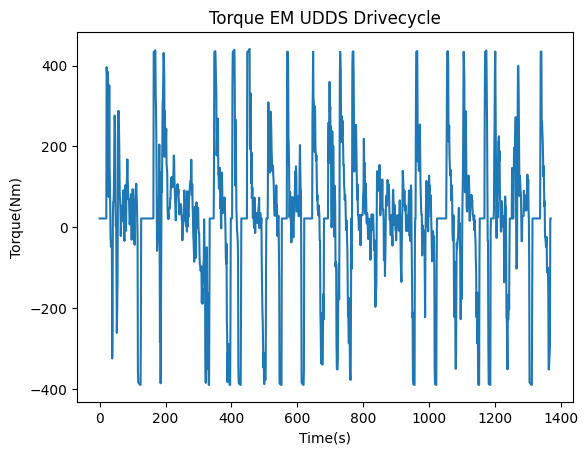

In [22]:
# plot torque wheel
plt.plot(time, Torque_EM)
plt.xlabel("Time(s)")
plt.ylabel("Torque(Nm)")
plt.title(f"Torque EM {file[0:4]} Drivecycle")
plt.savefig(f"Torque EM {file[0:4]} Drivecycle",dpi=1000,bbox_inches='tight')